<a href="https://colab.research.google.com/github/20-hayato/machine_learning_test/blob/main/lesson6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [2]:
# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

#0～9の手書き文字のデータセット
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


学習用データ画像枚数： 60000
評価用データ画像枚数： 10000
画像サイズ： (60000, 28, 28)


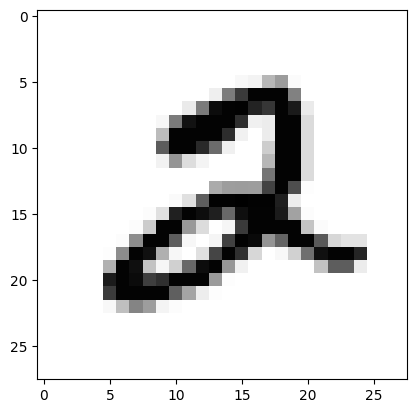

In [3]:
%matplotlib inline

print("学習用データ画像枚数：",len(train_images))
print("評価用データ画像枚数：",len(test_images))

print("画像サイズ：",train_images.shape)

#画像を表示してみる
fig = plt.Figure()
plt.imshow(train_images[5].reshape(28, 28), cmap='Greys')
plt.show()


#画像データの正規化
train_images_norm, test_images_norm = train_images / 255.0, test_images / 255.0


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),    #28x28の行列を784次元のベクトルに変換
 tf.keras.layers.Dense(128, activation='relu'),    #出力が128次元（ノード128個）の全結合層、活性化関数relu
 tf.keras.layers.Dropout(0.2),                     #DropOutを追加
 tf.keras.layers.Dense(10, activation='softmax')   #出力が10次元の全結合層、活性化関数softmax
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [5]:
 #epochs：学習を繰り返す回数、batch_size：ミニバッチ学習に使うデータ数　学習データ数/batch_size デフォルト値:32
result = model.fit(train_images_norm, train_labels, epochs=5,batch_size=20)



Epoch 1/5
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2779 - accuracy: 0.9172
Epoch 2/5
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1367 - accuracy: 0.9586
Epoch 3/5
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1039 - accuracy: 0.9678
Epoch 4/5
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0857 - accuracy: 0.9730
Epoch 5/5
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0721 - accuracy: 0.9770


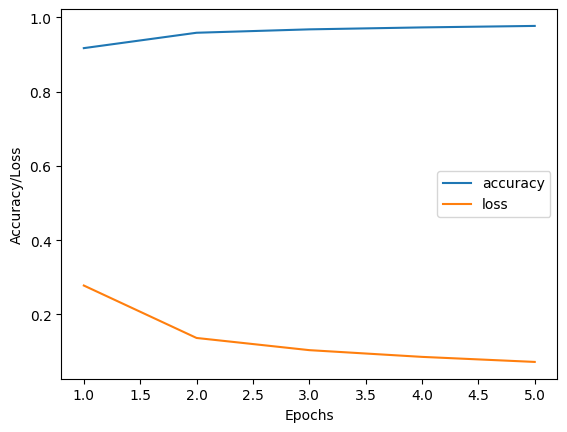

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
epochs = 5
plt.plot(range(1, epochs+1), result.history['accuracy'], label="accuracy")
plt.plot(range(1, epochs+1), result.history['loss'], label="loss")
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()


In [7]:
#評価データで評価する
model.evaluate(test_images_norm, test_labels, verbose=2)

313/313 - 1s - loss: 0.0753 - accuracy: 0.9782 - 590ms/epoch - 2ms/step


[0.0752672553062439, 0.9782000184059143]

In [8]:
layer_outputs = [layer.output for layer in model.layers[2:19]]
print(layer_outputs)

[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dropout')>, <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>]


(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 88ms/step
[[9.7303955e-06 2.8418552e-09 3.7518701e-06 1.8694341e-07 9.6426147e-01
  1.7240423e-07 2.2598347e-06 1.4083850e-04 1.5796850e-07 3.5581529e-02]]


4

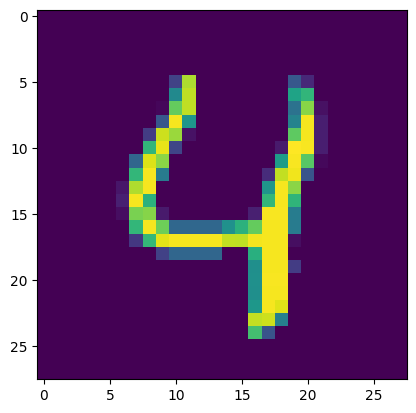

In [9]:
index = 4
plt.imshow(test_images_norm[index])
print(test_images_norm[index].shape)
print(test_images_norm[index][np.newaxis].shape)
pred = model.predict(test_images_norm[index][np.newaxis])
print(pred)
np.argmax(pred)

(None, 28, 28)
<PIL.Image.Image image mode=L size=28x28 at 0x7A02E0151F90>
(28, 28, 1)
array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


4

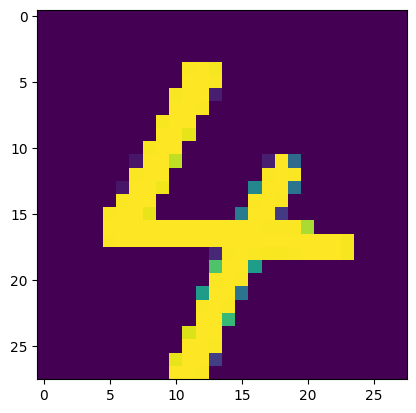

In [10]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import pprint

print(model.input_shape)

img = load_img('sample.png',grayscale=True, target_size=(28,28))
print(img)
img_data = img_to_array(img)
img_data = img_data/255
print(img_data.shape)
pprint.pprint(img_data)
img_data = img_data.reshape(1,28,28)
#img_data = img_data[None, ...]
pprint.pprint(img_data)

print(img_data.shape)

plt.imshow(img)
pred = model.predict(img_data)
print(pred)
np.argmax(pred)

(None, 28, 28)
<PIL.Image.Image image mode=L size=28x28 at 0x7A02E3FBA470>
(28, 28, 1)
array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [

2

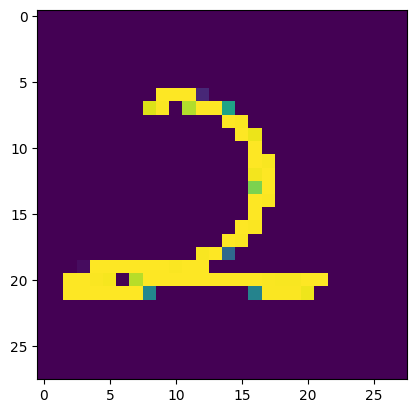

In [11]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import pprint

print(model.input_shape)

img = load_img('sample2.png',grayscale=True, target_size=(28,28))
print(img)
img_data = img_to_array(img)
img_data = img_data/255
print(img_data.shape)
pprint.pprint(img_data)
img_data = img_data.reshape(1,28,28)
#img_data = img_data[None, ...]
pprint.pprint(img_data)

print(img_data.shape)

plt.imshow(img)
pred = model.predict(img_data)
print(pred)
np.argmax(pred)